# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23699 строк и 22 столбца.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В представленных данных сразу можно обратить внимание на значения в строках min и max.  
Такие как, высота потолков = 1м или 100 м, жилая площадь = 2 м2 кажутся неправдободобными.  
Разберемся с этим на этапе предобработки данных.

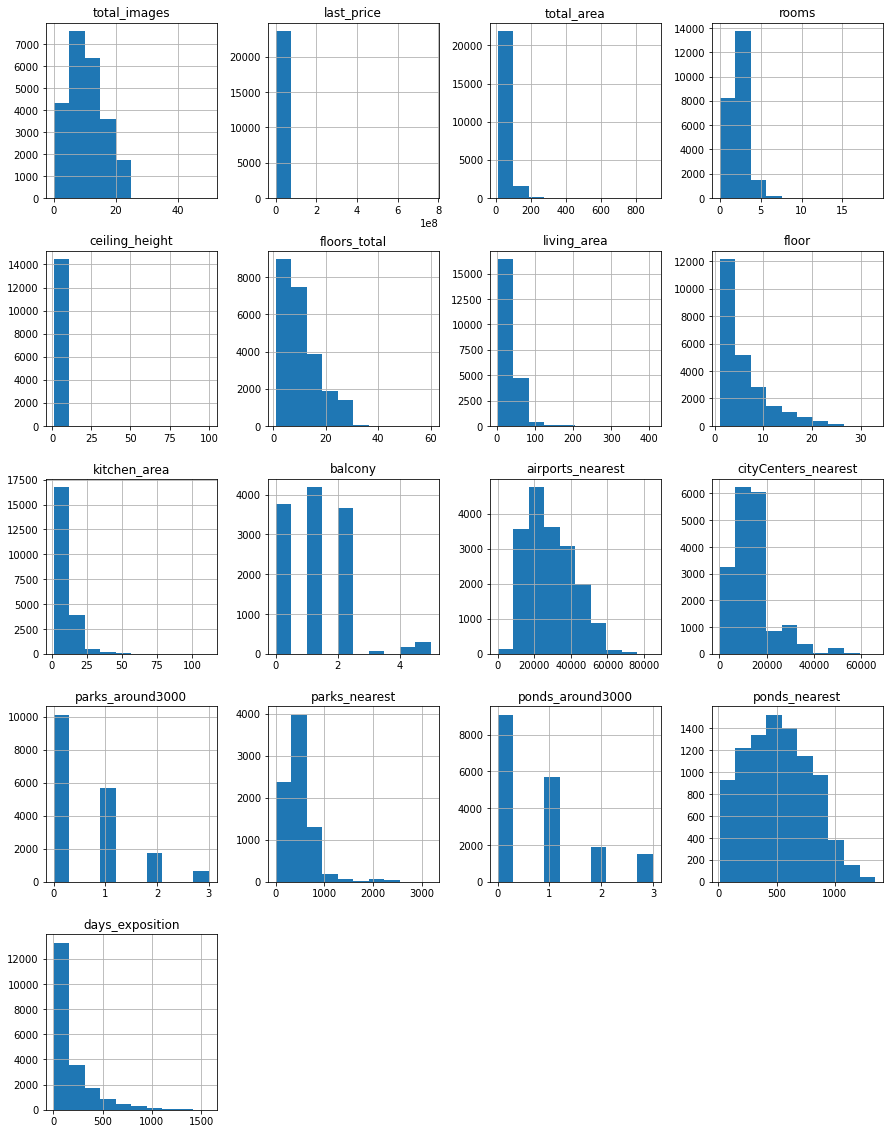

In [5]:
data.hist(figsize=(15,20));

Из гистограмм, на первый взгляд можно отметить, что наибольшее количесто объявлений - это продажа 2-х и 3-х комнатных квартир, в 5-ти и 9-ти этажных домах.  
Так же кажутся аномальными высокия значения `'living_area'` и `'kitchen_area'`.  
Большинство квартир расположено, не дальше 20 км от центра города, но есть и те, у которых расстояние больше 50 км.      
Количество комнат в районе значения 0 тоже вызывает вопросы.  
И наконец, из гисторгаммы days_exposition, видим что большое количество квартир продается за полгода, но были и те, что продавались более 3х лет.

**Выводы**

В каждой строке таблицы — данные об одном объявлении о продаже квартиры. Часть колонок описывает саму квартиру: площадь, этаж, число комнат и т.д. Остальные данные рассказывают о ее местоположении: населенный пункт, расстояние до центра города, аэпопорта и т.д. 

Предварительно можно утверждать, что, данных достаточно для проведения исследования. Но встречаются пропуски в данных, а так же столбцы, где нужно изменить тип данных (`last_price`, `first_day_exposition`, `balcony` и другие).  

Нужно проверить значения в столбцах `площадь кухни` и `жилая площадь`, а также другие редкие и выбивающиеся значения, которые могут повлиять на наши показатели. Далее мы с этим разберемся.

## Предобработка данных

Чтобы датафрейм выглядел более аккуратным, переименуем столбцы `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`

In [6]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                     'parks_around3000': 'parks_around_3000', 
                     'ponds_around3000': 'ponds_around_3000'}, 
            inplace=True)

In [7]:
# data.head()

### Найти, изучить и заполнить пропуски значений в столбцах

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ceiling_height**  
В столбце "высота потолков" пропущенно 9195 значений, для нашего исследования это большое количество, удалить мы их не можем.  

Конечно в части объявлений высоту потолков могли просто не указать, но из-за такого большого количества пропусков, можно предположить, что имеется и технический аспект, проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц могут быть причинами.  

Минимальное значение высоты потолков в жилых домах прописано в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные» и составляет 2,5 м. 

In [9]:
data['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Почти половина значний (из имеющихся) "правильной" высоты - 2,5 - 2,8 м.

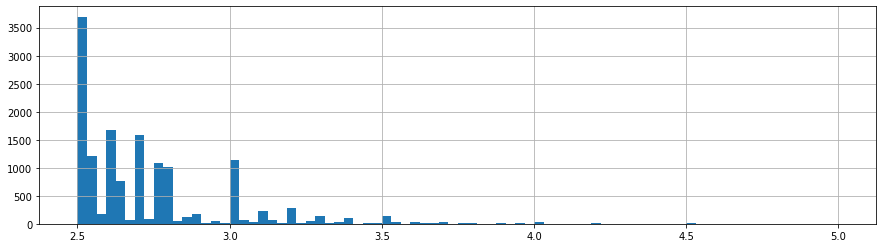

In [10]:
data['ceiling_height'].hist(figsize=(15,4), bins=80, range=(2.5,5));

In [11]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Хотя у данных и есть аномальные значения, они не сильно влияют на среднюю. Значения средней и медианы находятся примерно на одном уровне - 2,77 и 2,65 соответственно.  
Заменим пропуски в `'ceiling_height'` медианным значением 2,65 м.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [13]:
# data.head()

**floors_total** 

86 пропусков в данном столбце. Из-за такого маленького количества среди всей выборки, также можно предположить, что данные просто не были заполненны.  
Рассмотрим характеристики по данному столбцу.



In [14]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [15]:
data['floors_total'].value_counts().head(8)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
Name: floors_total, dtype: int64

In [16]:
data.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Среди данных квартир общего не наблюдается, сложно предположить какой этажности могли быть пропущенные дома. Среди этажей квартир наблюдаются и 3-й и 20-й, поэтому было бы неправильно присваивать им этажность в 5, 9 или больше этажей.  
А т.к. количество пропусков небольшое, оставим этот столбец пока без изменений.

**rooms count 0**  
*Т.к. я забежала немного вперед, следующим пунктом нужно привести количество комнат в порядок, а именно, там, где количество комнат = 0.*  
В дальнейшем это могло повлиять на медианное значение, которое расчитывается по количеству комнат в квартире (ниже), для заполнения пропусков в `living_area` и `kitchen_area`.


In [17]:
data.query('rooms == 0').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,197.000000,1.970000e+02,197.000000,197.0,197.000000,194.000000,183.000000,197.000000,0.0,126.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,183.000000
mean,7.776650,3.337724e+06,29.279746,0.0,2.839086,16.896907,18.865246,8.578680,NaN,1.579365,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,109.180328
std,5.079055,5.046022e+06,25.855264,0.0,1.749501,6.925936,6.549527,6.290595,NaN,0.661552,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,158.847377
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000e+06,24.050000,0.0,2.650000,12.000000,16.000000,3.000000,NaN,1.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,27.500000
50%,7.000000,2.700000e+06,26.050000,0.0,2.650000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,50.000000
75%,11.000000,3.380000e+06,28.400000,0.0,2.700000,23.000000,19.950000,13.000000,NaN,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,117.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.000000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


У нас 197 квартир. Среднее значение в `total_area` - 29 м2 - это все отднокомнатные квартиры. Осталось понять, как разнести оставшиеся площади по количеству комнат. И что делать с квартирой в 371 м2 и количеством комнат 0, вероятно она такая одна.

Проверим, как распределяются значения по общей площади (исключим площадь меньше 29 м2):

In [18]:
data.query('rooms==0 and total_area > 29')['total_area'].sort_values()

10416     29.10
7256      29.20
4971      29.30
22867     30.00
1600      30.00
7286      30.00
22053     30.10
5958      30.30
19735     30.50
15756     31.00
6805      31.00
13870     31.00
17954     31.00
18028     31.00
3147      31.00
1528      31.00
17805     31.10
1174      32.00
6220      32.00
15714     32.03
15704     32.20
7008      32.30
12229     32.40
18132     32.50
16521     32.80
21628     34.00
508       34.40
4683      35.00
839       35.00
9052      38.30
16130     42.10
7237      42.63
15319     43.30
10008     44.20
13613     58.40
21227     71.00
3458      73.60
20082     98.40
19392    371.00
Name: total_area, dtype: float64

Так и есть, квартира с площадью 371 м2 одна. С ней разберемся попозже.  
Найдем медианное значение общей площади для 1, 2, 3 и 4-х комнатных квартир 

In [19]:
for room in range(1,5):
    print(data.query('rooms == @room')['total_area'].median())
    print()

36.56

53.0

73.0

99.3



Добавим комнатность, согласно следующим критериям:  
Квартира площадью меньше 40м2 - однокомнатные  
Квартиры от 40 до 60 м2 - двухкомнатные  
Квартиры от 60 до 80 м2 - трехкомнатные  
Квартиры от 80 м2 - четырехкомнатные

In [20]:
data.loc[(data['rooms']==0) & (data['total_area']<40), 'rooms'] = 1
data.loc[(data['rooms']==0) & (data['total_area']>40) & (data['total_area']<60), 'rooms'] = 2
data.loc[(data['rooms']==0) & (data['total_area']>60) & (data['total_area']<80), 'rooms'] = 3
data.loc[(data['rooms']==0) & (data['total_area']>80) & (data['total_area']<100), 'rooms'] = 4

In [21]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,False,True,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


И разберемся с нашей квартирой площадью 371м2.  
Найдем медианное значение количества комнат для квартиры площадью от 300 до 400 м2 и присвоим это значение нашей квартире.

In [22]:
data.query('300 < total_area < 400')['rooms'].median()

6.0

In [23]:
data.loc[(data['rooms']==0) & (data['total_area'] ==371), 'rooms'] = 6

In [24]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


**living_area**  

В столбце пропущено 1903 значений, это достаточно большое количество. Посмотрим на характеристики столбца.

In [25]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Среднее и медианное значения, не сильно, но различаются. Это связано с разбросом в значениях, 2м2 слишком маленькое значение для жилой площади, так же есть и очень большие значения, позднее проверим их на "аномальность".  


Для того, чтобы заполнить пропущенные значения в `'living_area'`, будем использовать медианное значение жилой площади по количеству комнат.  
Сгруппируем количество комнат и выведем для каждой группы медианное значение. Далее с помощью цикла заменим все пропущенные значения на медианное значение.


In [26]:
median_liv_area = data.groupby('rooms')['living_area'].median()
median_liv_area

rooms
1      17.600
2      30.500
3      45.000
4      63.550
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [27]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = median_liv_area[room]       

In [28]:
data['living_area'].isna().sum()

0

**is_apartment**  

В столбце `is_apartment` 20924 пропусков. Скорее всего данные квартиры не являются апартаментами, т.к. такой тип недвижимости появился относительно недавно.  

In [29]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Заменим пропуски значением `False`.

In [30]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [31]:
data['is_apartment'].isna().sum()

0

**kitchen_area**   

В столбце прорущено 2278 значений. Посмотрим на характеристики данного столбца.

In [32]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

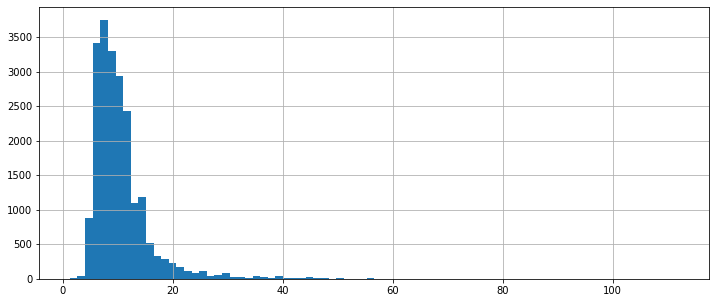

In [33]:
data['kitchen_area'].hist(figsize=(12,5), bins=80);

Медианное и среднее значение здесь уже различаются, это связано с сильным разбросом значений, как мы видим из описания, максимальное значение - 112 м2, а минимальное чуть больше 1 м2. То же подтверждает нам гистограмма. На ней также видно, что в большинстве квартир, площадь кухни в диапазоне 5-15 м2. Видны и выбивающиеся значения более 20 м2.
Здесь, как и с `жилой площадью`, целесообразнее будет использовать для заполнения пропусков медианное значение по количеству комнат в квартире. 

In [34]:
median_kit_area = data.groupby('rooms')['kitchen_area'].median()

In [35]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_kit_area[room]

In [36]:
data['kitchen_area'].isna().sum()

0

**balcony**  
В столбце `balcony` пропущено 11519 значений. В данном случае их скорее всего не указали, потому что их нет.  
Заменим пропущенные значения на 0.

In [37]:
data['balcony'] = data['balcony'].fillna(0)

In [38]:
# data['balcony'].isna().sum()

**locality_name**  
В данном столбце 49 пропусков, для наших данных это незначительное количество, пока оставим как есть, в последующем скорее всего удалим эти строки из наших данных.


**`airports_nearest`** - 5542 пропусков   
**`city_centers_nearest`** - 5519 пропусков  
**`parks_nearest`** - 15620 пропусков  
**`ponds_nearest`** - 14589 пропусков  

Среди `airports_nearest`и `city_centers_nearest`, а также `parks_nearest` и `ponds_nearest` мы видим схожее количество пропусков соответственно. Можно предположить, что данные не были внесены по этим пунктам или же были утеряны.  
Заполнить эти данные медианой или средней по всему столбцу было бы некорректно, так как это сильно может повлиять на анализ и исказить результаты и выводы. Поэтому оставим все без изменений.

**`parks_around_3000`** - 5518 пропусков  
**`ponds_around_3000`** - 5518 пропусков  

Аналогичная картина, как выше. Но в данном случае, заменим все пропущенные значения на 0.

In [39]:
data['parks_around_3000'] = data['parks_around_3000'].fillna('0')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna('0')

In [40]:
# print(data['parks_around_3000'].isna().sum())
# print(data['ponds_around_3000'].isna().sum())

**`days_exposition`** - 3181 пропусков.  
Можно предположить, что если есть пропуски, то данная квартира еще не продана. Тогда эти пропуски заполнять не будем и оставим как есть.

Проверим количество пропусков, после всех изменений.

In [41]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Изменение типов данных в необходимых столбцах

**`last_price`** float64  - заменим на int  
**`first_day_exposition`** object  - заменим на datetime  
**`floors_total`** float64  - заменим на int  
**`is_apartment`** object  - заменим на bool  
**`balcony`** float64  - заменим на int  
**`parks_around_3000`** float64  - заменим на int  
**`ponds_around_3000`** float64  - заменим на int  
**`days_exposition`** float64  - заменим на int  

In [42]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = np.floor(pd.to_numeric(data['floors_total'], errors='coerce')).astype('Int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [43]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

*Типы данных всех выделенных столбцов были изменены корректно*  
На тип `int` были изменены столбцы, которые содержат в себе целочисленные значения.  
Тип `bool` мы присвоили столбцу `is_apartment`, так как он содержит в себе значения True и False.  
И для столбца `first_day_exposition` был применен тип `datetime` потому, что он содержит в себе дату.

### Изучение уникальных значений в столбце с названиями населенных пунктов и устранение неявных дубликатов.

In [44]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Здесь мы видим повторяющиеся значения `поселок` и `посёлок`, а также `поселок городского типа` и `городской поселок`.  
Устраним эти неявные дубликаты.

In [45]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [46]:
# data['locality_name'].unique()

### Нахождение и устранение редких и выбивающихся значений

Для начала удалим строки с отсутствующими значениями в `floors_total` и `locality_name` (86 и 49 соответственно).

In [47]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)

Еще раз посмотрим на показатели всех столбцов для принятия решения

In [48]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.079610,2.724530,10.675875,34.328714,5.878124,10.447662,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.066708,0.991026,6.594823,21.728670,4.871485,5.643094,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**`total_images`** - с этим столбцом все хорошо, фотографий может совсем не быть, или же 50, как в нашем случае (max = 50).  
**`floor`** - столбец выглядит корректно, аномальных и выбивающихся значений нет.  
**`balcony`** - Выбивающихся значений здесь нет, балконов может совсем не быть или, как в нашем случае (max = 5), 5 балконов, видимо это большая квартира, которая может себе это позволить (но даже если общая площадь, на наш взгляд, небольшая, мы не можем с уверенностью заменить в них значение на меньшее или же удалить такие строки, они нам пригодятся).  
**`city_centers_nearest`** - максимальное значение в данном столбце почти 66 км. Но так как мы анализируем не только квартиры Санкт-Петербурга, но и соседние населенные пункты, оставим этот столбец без изменений.  
**`parks_nearest`** и **`ponds_nearest`** - данные столбцы оставляем без изменений, сильно выбивающихся значений нет.  
**`parks_around_3000`** и **`ponds_around_3000`** - здесь аналогичная ситуация, парк/пруд либо есть (max 3 шт.), либо их нет.

**`last_price`**  
Из характеристик столбца видно, что у нас есть очень маленькое значение цены (12190). Так же имеютя и очень высокие значения (max 763млн.). Даже если предположить, что это не аномальные значения, а действительно дорогие и уникальные квартиры, для нашего анализа они не подходят, будут искажать показатели. Избавимся от очень дешевых и очень дорогих квартир. Построим гисторгамму для наглядности.

In [49]:
print('Количество квартир со стоимостью менее 400.000:', data.query('last_price < 400000')['last_price'].count())
print('Количество квартир со стоимостью более 100.000.000:', data.query('last_price > 100000000')['last_price'].count())

Количество квартир со стоимостью менее 400.000: 1
Количество квартир со стоимостью более 100.000.000: 37


In [50]:
data.drop(index=data.query('last_price < 400000 | last_price > 100000000').index, inplace=True)

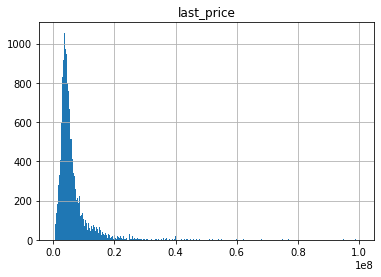

In [51]:
data.hist('last_price', bins=500, range=(4e+05,1e+08));

**`total_area`**  
Количество квартир общей площадью меньше 20 м2 - 27 штук.  
Оставим их в наших данных, т.к. скорее всего это квартиры-студии и имеют право на существование, не будем принимать их за аномальные значения.  
А квартиры площадью более 400 м2 удалим, они могут повлиять на наши показатели(тем более среди них квартира площадью 900м2, которая точно выбивается). По получившимся данным построим гистограмму.

In [52]:
print('Количество квартир общей площадью меньше 20 м2:', data.query('total_area < 20')['total_area'].count())
print('Количество квартир общей площадью больше 400 м2:', data.query('total_area > 400')['total_area'].count())

Количество квартир общей площадью меньше 20 м2: 27
Количество квартир общей площадью больше 400 м2: 14


In [53]:
data.drop(index=data.query('total_area > 400').index, inplace=True)

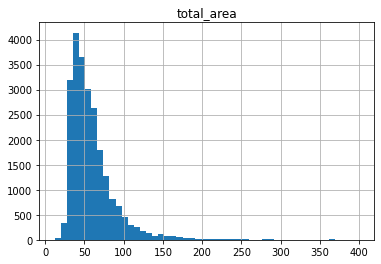

In [54]:
data.hist('total_area', bins=50);

**`rooms`**  
Выше, мы уже немного обработали данный столбец, поправили количество комнат (изначально были строки с количеством комнат = 0).  
Из характеристик столбца видно, что максимальное количество комнат - 19. Проверим какое количество квартир с количеством комнат более 10 и удалим их. По итогам, так же построим гистограмму.

In [55]:
data.query('rooms > 10')['rooms'].count()

6

In [56]:
data.drop(index=data.query('rooms > 10').index, inplace=True)

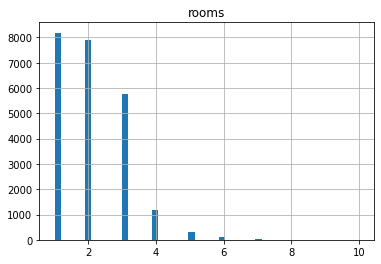

In [57]:
data.hist('rooms', bins=50);

**`ceiling_height`**  
Из характеристик видно, что минимальное и максимальное значение составляют 1м и 100м соответственно.  
По стандарту высота потолков не может быть ниже 2,5 м. Также, если предположить, что в нашей выборке есть и двухуровневые квартиры, установим планку высоты потолка в 5м. Проверим, сколько квартир попадает в диапазон между 25 и 50, возможно это просто опечатка и не хватает запятой. Изменим строки, где это возможно и отбросим выделяющиеся, построим гистограмму.

In [58]:
data.query('ceiling_height >= 25 & ceiling_height <= 50')['ceiling_height'].count()

19

In [59]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50), 'ceiling_height'] = data['ceiling_height']/10

In [60]:
data.drop(index=data.query('ceiling_height < 2.5 | ceiling_height > 5').index, inplace=True)

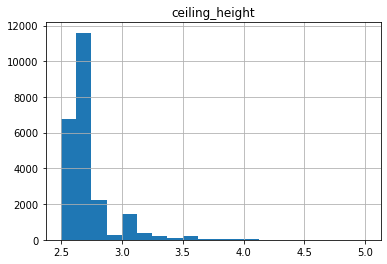

In [61]:
data.hist('ceiling_height', bins=20);

**`floors_total`**  
В нашей выборке есть одноэтажние дома, но скорее всего это не выбросы. На гистограмме видны дома, с этажностью больше 30 этажей, проверим их количество и удалим.

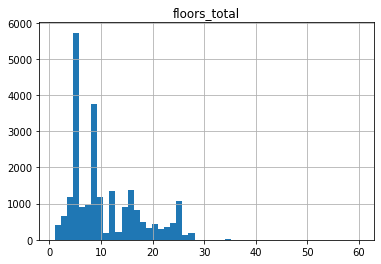

In [62]:
data.hist('floors_total', bins=50);

In [63]:
data.query('floors_total > 30')['floors_total'].count()

31

In [64]:
data.drop(index=data.query('floors_total > 30').index, inplace=True)

**`living_area`**  
Здесь у нас имеются выбивающиеся значения как в меньшую, так и в большую стороны. Проверим количество квартир жилой площадью меньше 10м2 и больше 200м2 и удалим их.

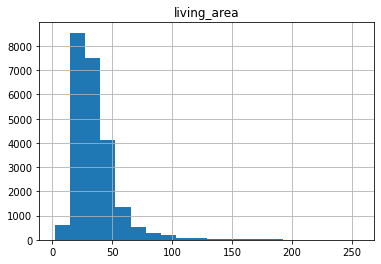

In [65]:
data.hist('living_area', bins=20);

In [66]:
data.query('living_area < 10 or living_area > 200')['living_area'].count()

34

In [67]:
data.drop(index=data.query('living_area < 10 | living_area > 200').index, inplace=True)

**`kitchen_area`**  
На графике видно, что у нас есть значения близкие к нулю, а также превышающие 50 м2. Посмотрим на их количество и удалим.

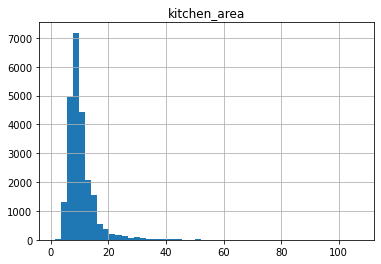

In [68]:
data.hist('kitchen_area', bins=50);

In [69]:
data.query('kitchen_area < 4 or kitchen_area > 50')['kitchen_area'].count()

61

In [70]:
data.drop(index=data.query('kitchen_area < 4 | kitchen_area > 50').index, inplace=True)

**`airports_nearest`**  
Видим, что есть минимальное значение 0, от него мы точно избавимся. Максимальные значения трогать не будем.

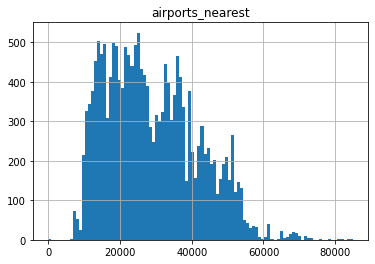

In [71]:
data.hist('airports_nearest', bins=100);

In [72]:
data.query('airports_nearest < 6000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,True,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60


In [73]:
data.drop(index=data.query('airports_nearest < 6000').index, inplace=True)

**`days_exposition`**  
Из графика и описания мы видим, что медианная продолжительность продажи квартир составляет 3 месяца.  
Имеются и квартиры, которые продавались больше трех лет. Для нашего анализа они будут не показательны, посмотрим на их количество и удалим.

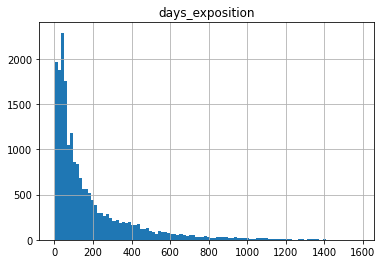

In [74]:
data.hist('days_exposition', bins=100);

In [75]:
data.query('days_exposition > 1100')['days_exposition'].count()

160

In [76]:
data.drop(index=data.query('days_exposition > 1100').index, inplace=True)

In [77]:
data.reset_index(drop= True , inplace= True )  # обновим индексы после всех изменений

In [78]:
# data.info()

**Выводы**

На этапе предобработки данных была проделанна большая работа.  
-  Заполнили пропущенные значения в столбцах *`ceiling_height`*, *`living_area`*, *`is_apartment`*, *`kitchen_area`*, *`balcony`*, *`parks_around_3000`* и *`ponds_around_3000`*.  
-  Были удалены пропущенные значения *`floors_total`* и *`locality_name`* (86 и 49 соответственно), так как не было возможности выяснить этажность домов и названия населенных пунктов.  
-  Привели в соответствие типы данных. Целочисленным значениям был присвоен тип данных `int`, для даты применили тип `datetime`, столбцу `is_apartment` был присвоен тип `bool`.  
-  Убрали неявные дупликаты в названиях населенных пунктов.  
-  Выявили и устранили редкие и выбивающиеся значения. Откинули очень дешевые и дорогие квартиры, избавились от квартир площадью более 400 м2 и комнатностью больше 10. Обработали аномальные значения в столбце `ceiling_height`. Убрали аномально маленькие и редкие большие значения в столбце `kitchen_area`. И наконец, отбросили квартиры, которые продавались больше трех лет, т.к. потеряли уже свою актуальность.  

Количество строк до начала предобработки: 23699  
Количество строк после предобработки: 23132  
Итого было удалено менее 3% строк.

## Посчитать и добавить в таблицу новые столбцы

**Добавим в таблицу столбец `price_per_square` - цена одного квадратного метра.**

In [79]:
data['price_per_square'] = data['last_price']/data['total_area']

**Добавим в таблицу столбец `day_public` - день недели публикации объявления.**

In [80]:
data['day_public'] = data['first_day_exposition'].dt.weekday

**Добавим в таблицу столбец `month_public` - месяц публикации объявления.**

In [81]:
data['month_public'] = data['first_day_exposition'].dt.month

**Добавим в таблицу столбец `year_public` - год публикации объявления.**

In [82]:
data['year_public'] = data['first_day_exposition'].dt.year

**Добавим в таблицу столбец `floor_type` - тип этажа квартиры.**  
Произведем категоризацию данных по числовому диапазону. Напишем функцию для столбца `floor`, и с помощью метода `apply` применим ее к новому столбцу.

In [83]:
def floor_group(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floor:
        return 'последний'
    return 'другой'

Для начала проверим нашу функцию на небольшом датафрейме:

In [84]:
row_values = [[16, 16], [1,8], [2,10]]
row_columns = ['floor', 'floors_total']
row = pd.DataFrame(data = row_values, columns = row_columns)
row

,floor,floors_total
0,16,16
1,1,8
2,2,10


In [85]:
row['floor_type'] = row.apply(floor_group, axis=1)
row

,floor,floors_total,floor_type
0,16,16,последний
1,1,8,первый
2,2,10,другой


Все работает корректно, применим функцию к нашим данным.

In [86]:
data['floor_type'] = data.apply(floor_group, axis=1)

**Добавим в таблицу столбец `distance_center` - расстояние до центра города в километрах.**  

In [87]:
data['distance_center'] = round(data['city_centers_nearest'] / 1000)

**Выводы**

В таблицу с исходными данными были добавлены следующие столбцы:
-  цена одного квадратного метра `price_per_square`  
-  дата публикации объявлений (день, месяц и год (`day_public`, `month_public` и `year_public`))
-  тип этажа квартиры `floor_type`
-  расстояние до центра города в километрах `distance_center`

## Проведение исследовательского анализа данных

### Изучение основных параметров объекта недвижимости

**`Общая площадь`**

In [88]:
data['total_area'].describe()

count    23132.000000
mean        59.244868
std         30.667649
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        400.000000
Name: total_area, dtype: float64

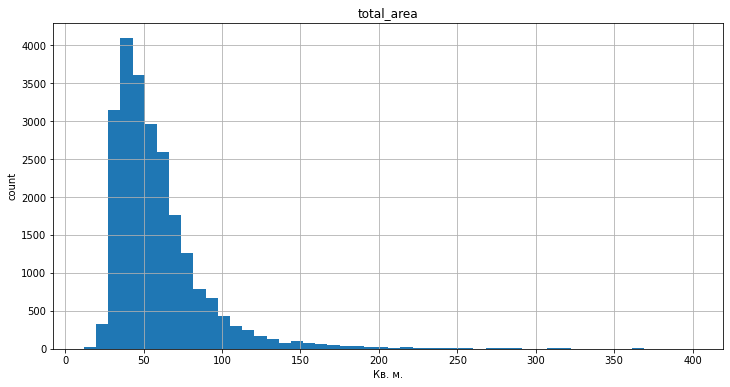

In [89]:
data.hist('total_area', bins=50, figsize = (12,6))
plt.xlabel('Кв. м.')
plt.ylabel('count')
plt.show()

Из графика стоит отметить, что больше всего квартир представленно в диапазоне площадью 30-70 кв.м. Чаще всего встречаются квартиры площадью в районе 40 кв.м. После 100 кв.м. видим заметный спад. Среднее и медианное значения (59.4 и 52 соответственно) имеют различие, это обусловленно тем, что в выборке представлены и совсем небольшие квартиры, площадью меньше 20кв.м. (студии) и квартиры с большой площадью, больше 150 кв.м.

**`Жилая площадь`**

In [90]:
data['living_area'].describe()

count    23132.000000
mean        33.805915
std         19.399919
min         10.000000
25%         18.400000
50%         30.200000
75%         42.400000
max        200.000000
Name: living_area, dtype: float64

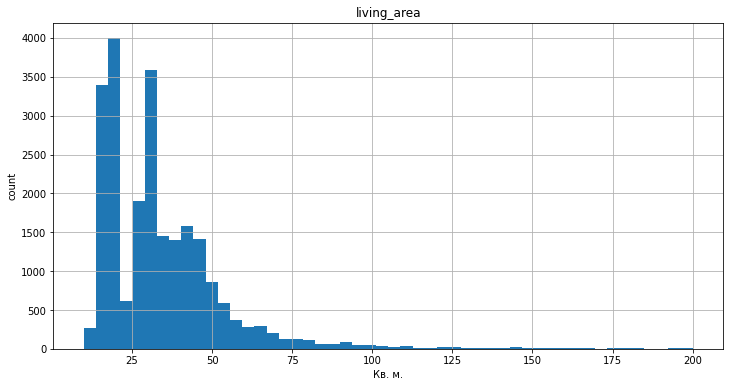

In [91]:
data.hist('living_area', bins=50, figsize = (12,6))
plt.xlabel('Кв. м.')
plt.ylabel('count')
plt.show()

На графике видно два пика в районе 20кв.м. и 30 кв.м., что соответствует самым популярным продаваемым квартирам - одно и двух-комнатные. Спад наблюдается после отметки в 50 кв.м., что характерно для больших или элитных квартир, которых представленно гораздо меньше.

**`Площадь кухни`**  

In [92]:
data['kitchen_area'].describe()

count    23132.000000
mean        10.283639
std          4.898391
min          4.000000
25%          7.300000
50%          9.040000
75%         11.400000
max         50.000000
Name: kitchen_area, dtype: float64

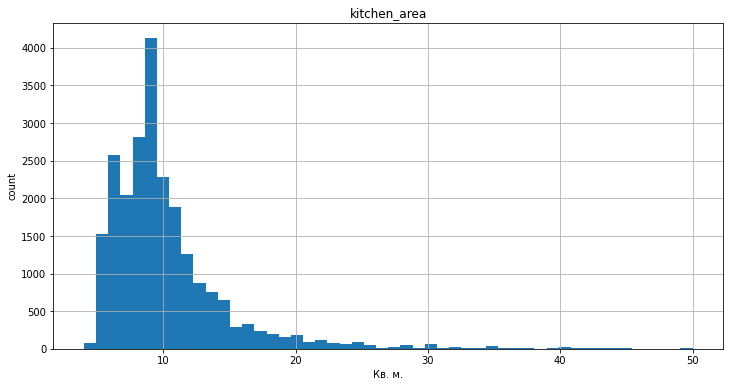

In [93]:
data.hist('kitchen_area', bins=50, figsize = (12,6))
plt.xlabel('Кв. м.')
plt.ylabel('count')
plt.show()

Пик наблюдается в районе 9кв.м, что соответствует нашему медианному значению. В целом в продаже больше всего квартир с площадью кухонь в диапазоне 5 - 13 кв.м. Спад после 15 кв.м. также характеризуется элитной недвижимостью/квартирами большой площади.

**`Цена объекта`**

In [94]:
data['last_price'].describe()

count    2.313200e+04
mean     6.131827e+06
std      5.986760e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64

Разделим все значения в столбце `last_price` на 1млн. для лучшей наглядности.

In [95]:
data['last_price'] = data['last_price']/1000000

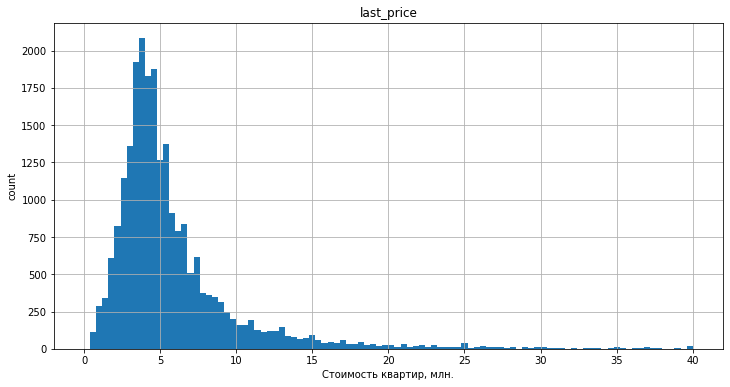

In [96]:
data.hist('last_price', bins=100, range=(0,40), figsize = (12,6))
(data['last_price']/1000000).hist(range=(0, 20), bins=15);
plt.xlabel('Стоимость квартир, млн.')
plt.ylabel('count')
plt.show()

В среднем квартиры продаются по цене в 6млн.  
Пиковое значение на гистограмме соответствует нашему медианному значению в 4.6 млн.  
Далее цены растут, а количество предложений снижается.

**`Количество комнат`**

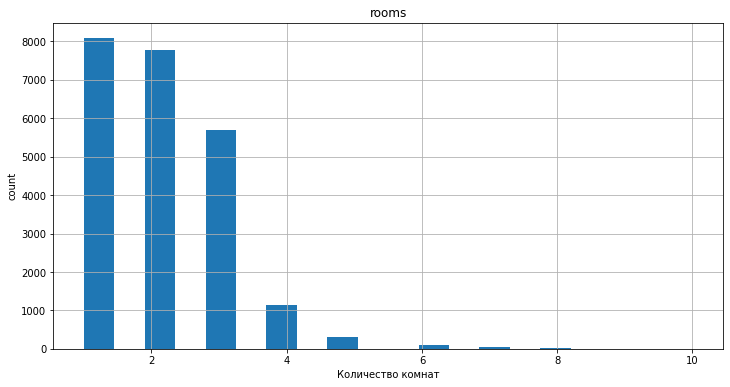

In [97]:
data.hist('rooms', bins=20, figsize = (12,6))
plt.xlabel('Количество комнат')
plt.ylabel('count')
plt.show()

Как и ожидаемо, в тройке лидеров у нас 1, 2 и 3-х комнатные квартиры.

**`Высота потолков`** 

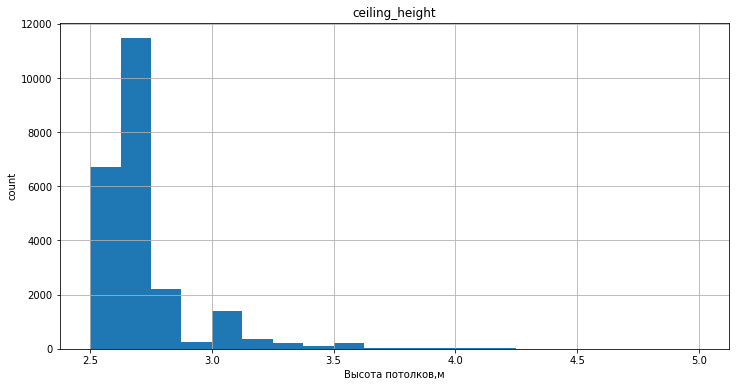

In [98]:
data.hist('ceiling_height', bins=20, figsize = (12,6))
plt.xlabel('Высота потолков,м')
plt.ylabel('count')
plt.show()

В большинстве квартир, высота потолков в диапазоне 2.6 - 2.8м, что соответствует стандартам. Так же видим небольшой пик в районе 3м, такая высота характерна для "сталинок". 

**`Этаж квартиры`**

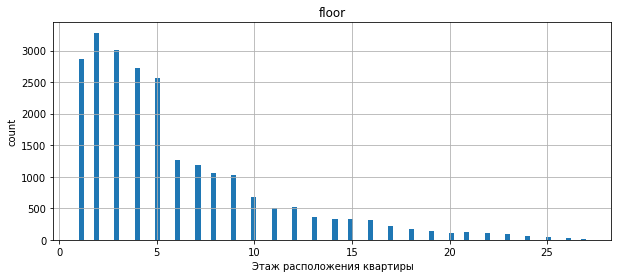

In [99]:
data.hist('floor', bins=100, figsize = (10,4))
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('count')
plt.show()

Согласно гистограмме, больше всего продается квартир на 1-х - 5-х этажах. Пиковое значение на втором этаже. Далее видим заметный спад, квартиры на 6 этаже и выше представленны реже.

**`Тип этажа квартиры`**

Типы квартир мы разбили по категориям, посмотрим в каком количестве они распределились и построим гистограмму.

In [100]:
data['floor_type'].value_counts()

другой       17017
последний     3250
первый        2865
Name: floor_type, dtype: int64

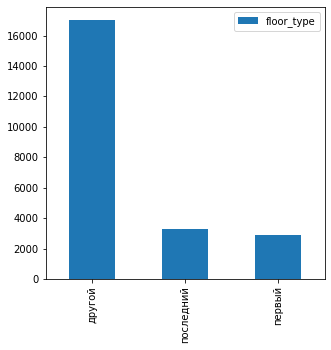

In [101]:
data['floor_type'].value_counts().plot.bar(figsize=(5, 5), legend=True)
plt.show()

Больше всего продается квартир, расположенных со второго по предпоследние этажи.   
Первый и последний этажи представленны приблизительно в равном объеме, но их значительно меньше.

**`Общее количество этажей в доме`**

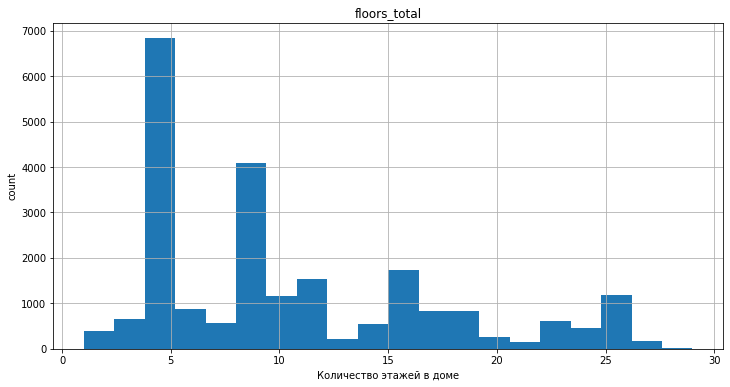

In [102]:
data.hist('floors_total', bins=20, figsize = (12,6))
plt.xlabel('Количество этажей в доме')
plt.ylabel('count')
plt.show()

Пиковое значение относится к пятиэтажным домам. Большинство квартир представленны именно в них. Далее идут девятиэтажные дома.  
Стоить отметить небольшие пики в районе 15-го этажа, такие дома начали строить в 80-х годах. И следующий пик в районе 25-ти этажей - что характерно для современных домов.

**`Расстояние до центра города (в метрах)`**

In [103]:
data['city_centers_nearest'].describe()

count    17690.000000
mean     14241.159073
std       8587.415806
min        181.000000
25%       9381.250000
50%      13138.000000
75%      16285.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

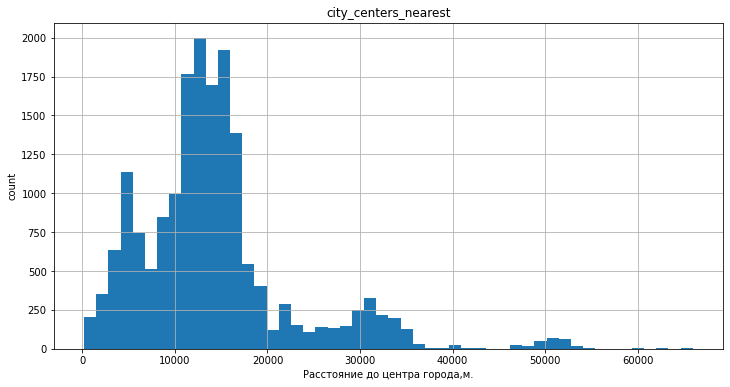

In [104]:
data.hist('city_centers_nearest', bins=50, figsize = (12,6))
plt.xlabel('Расстояние до центра города,м.')
plt.ylabel('count')
plt.show()

Большая масса объектов недвижимости расположена на расстоянии 10-17 км от центра города. Имеются квартиры и ближе к центру, небольшой пик наблюдается в районе 5-ти километров. С увеличением расстояния, количество предложений уменьшается. Мы можем наблюдать "островки", это населенные пункты возле Санкт-Петербурга. Так например, г. Пушкин расположен примерно в 30-ти км. от  Санкт-Петербурга, отчетливо виден на нашей гистограмме.

**`Расстояние до аэропорта`**

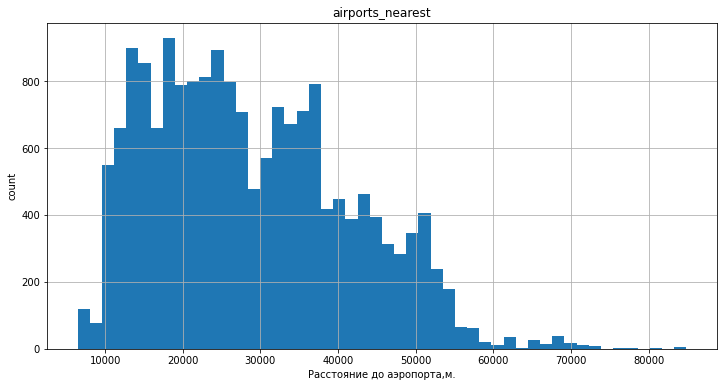

In [105]:
data.hist('airports_nearest', bins=50, figsize = (12,6))
plt.xlabel('Расстояние до аэропорта,м.')
plt.ylabel('count')
plt.show()

В данном столбце было достаточно большое количество пропусков, но среди имеющихся данных, много объектов жилой недвижимости расположено на расстоянии 15-25 км. от аэропорта. С увеличением расстояния, количество квартир снижается.

**`Расстояние до парка`**

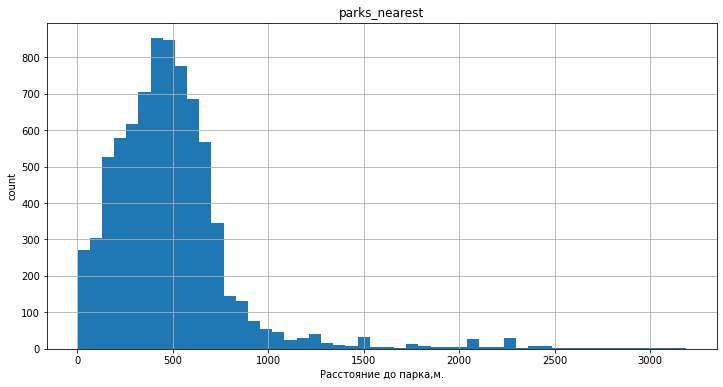

In [106]:
data.hist('parks_nearest', bins=50, figsize = (12,6))
plt.xlabel('Расстояние до парка,м.')
plt.ylabel('count')
plt.show()

Стоит отметить, что в данном столбце было очень большое количество пропусков, практически 70%.  
На основании имеющихся данных, из гистограммы видно, что есть квартиры, расположенные в непосредственной близости от парка, а больше всего объектов жилой недвижимости преставлено на расстоянии 400 - 650 м. С увеличением расстояния, так же наблюдается спад предложений.

 **`День и месяц публикации объявлений.`**

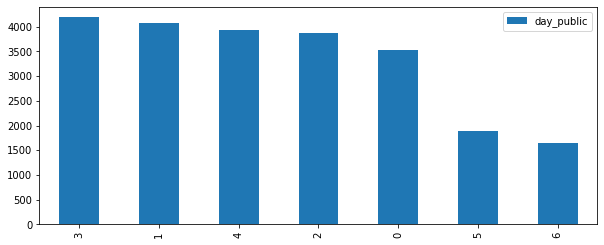

In [107]:
data['day_public'].value_counts().plot.bar(figsize=(10, 4), legend=True)
plt.show()

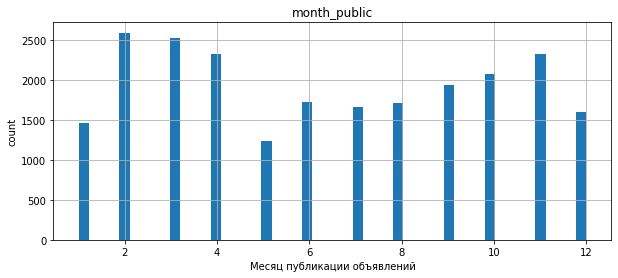

In [108]:
data.hist('month_public', bins=50, figsize = (10,4))
plt.xlabel('Месяц публикации объявлений')
plt.ylabel('count')
plt.show()

Из гистограмм отчетливо видно, что основная масса объявлений публикуется в будние дни, больше всего в четверг.  
Что касается месяца, больше всего объявлений в феврале и марте, далее идут апрель и ноябрь. В летние месяцы и в декабре / январе заметен значительный спад, что конечно объясняется отпусками и отдыхом в летний период и новогодними праздниками зимой.

**Выводы**

Самые продавающиеся квартиры площадью 30-70 кв.м. и площадью кухонь - 9 кв.м.  
В среднем квартиры продаются по цене в 6млн., но представлена и более дорогая недвижимость.  
По комнатности больше всего предложений среди одно- и двухкомнатных квартир, а по этажу расположения лидируют квартиры на втором и третьем этажах. Среди этажности домов, больше всего представлены пяти- и девятиэтажные дома.  
По удаленности от центра города бОльшая масса продаваемой жилой недвижимости представленна на расстоянии 10-17 км. Что касается расстояния до аэропрта и ближайших парков, стоит отметить, что в данных столбцах имелись пропуски в данных. По имеющимся данным много объектов жилой недвижимости расположено на расстоянии 15-25 км. от аэропорта и в 500 м. от парка.  
По дате публикации можно выделить, что основная масса объявлений публикуется в будние дни, а среди месяцев - в феврале и марте.

### Изучить как быстро продавались квартиры.

In [109]:
data['days_exposition'].describe()

count    20001.000000
mean       171.864757
std        198.160084
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1100.000000
Name: days_exposition, dtype: float64

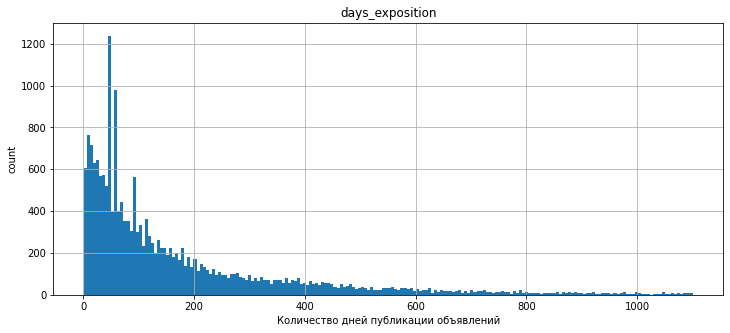

In [110]:
data.hist('days_exposition', bins=200, figsize = (12,5))
plt.xlabel('Количество дней публикации объявлений')
plt.ylabel('count')
plt.show()

Интересная ситуация. Из описания мы видим, что медианное время продажи квартиры 93 дня. Средняя же продолжительность продажи квартиры составляет 172 дня, и она меньше стандартного отклонения (198). Такое сильное различие вызвано сильными выбросами, которое мы видим и на гистограмме. Рассмотрим диапазон с выбросами поближе:

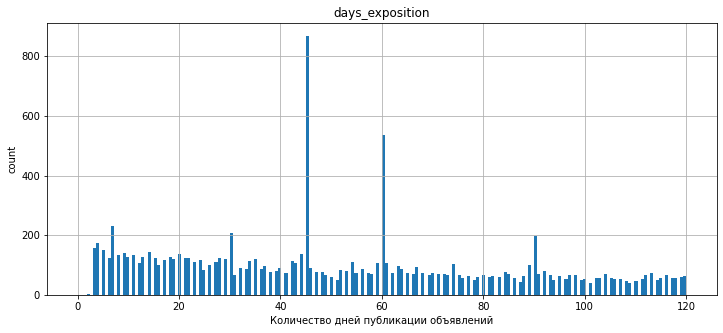

In [111]:
data.hist('days_exposition', bins=200, range=(0,120), figsize = (12,5))
plt.xlabel('Количество дней публикации объявлений')
plt.ylabel('count')
plt.show()

Видим, что пиковые значения на 45 и 60-й день, так же небольшие пики на 30 и 90-й.
На сайте "Яндекс.справка" (https://yandex.ru/support/realty/paid.html?lang=ru) указано, что сроки публикации в Санкт-Петербурге и области для бесплатного объявления - 120 дней, для платного - 30 дней. Немного не идет с нашими пиковыми значениями. Но так же указано, что для других регионов сроки размещения бесплатного объявления составляют 45, 60 и 90 дней (в зависимости от стоимости квартиры). Это уже похоже на правду, предположим, что такое правило Яндекс ввел позднее (в нашей выборке объявления 2014 - 2019 гг) и раньше это распространялось и на Санкт-Петербург. Посмотрим на эти "пиковые" квартиры и какое их количество.

In [112]:
data.query('days_exposition == 30 or days_exposition == 45 or days_exposition == 60 or days_exposition ==90')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_public,month_public,year_public,floor_type,distance_center
12,10,3.89,54.0,2016-06-30,2,2.65,5,30.0,5,True,False,False,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90,72037.037037,3,6,2016,последний,NaN
22,20,5.00,58.0,2017-04-24,2,2.75,25,30.0,15,True,False,False,11.00,2,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,60,86206.896552,0,4,2017,другой,NaN
78,9,4.35,37.0,2018-02-22,1,2.65,19,18.0,6,True,False,False,10.70,0,Санкт-Петербург,34324.0,14192.0,0,NaN,0,NaN,45,117567.567568,3,2,2018,другой,14.0
82,3,4.50,80.5,2018-01-15,3,2.65,25,45.0,16,True,False,False,9.50,0,поселок Шушары,12430.0,18217.0,0,NaN,0,NaN,60,55900.621118,0,1,2018,другой,18.0
89,9,2.50,63.0,2018-10-25,3,2.50,5,43.0,4,True,False,False,9.00,0,поселок городского типа Сиверский,NaN,NaN,0,NaN,0,NaN,45,39682.539683,3,10,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23069,9,5.10,36.0,2018-10-26,1,2.80,15,18.0,11,True,False,False,8.00,0,Санкт-Петербург,13643.0,11673.0,0,NaN,1,405.0,60,141666.666667,4,10,2018,другой,12.0
23076,14,5.95,80.3,2018-07-03,3,2.70,12,45.0,5,True,False,False,9.50,0,Колпино,27933.0,33719.0,0,NaN,2,562.0,60,74097.135741,1,7,2018,другой,34.0
23103,9,2.45,45.6,2018-02-08,1,2.80,9,17.6,2,True,False,False,9.04,0,поселок городского типа Синявино,NaN,NaN,0,NaN,0,NaN,45,53728.070175,3,2,2018,другой,NaN
23112,0,2.50,35.0,2017-12-08,1,2.65,9,17.6,4,True,False,False,9.04,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45,71428.571429,4,12,2017,другой,NaN


In [113]:
len(data.query('days_exposition == 30 or days_exposition == 45 or days_exposition == 60 or days_exposition ==90'))

1808

Критериев, объединяющие эти квартиры, обнаружить не удалось. Вероятно, такие выбросы нужно бы удалить. Но мы не можем с точностью утверждать, что среди этих объектов недвижимости нет тех, которые на самом деле были проданы за эти периоды. А лишаться почти двух тысяч "хороших" строк, было бы нецелесообразно, они нам пригодятся для анализа других показателей.  
Сформируем данные, исключающие эти значения, и построим по ним гистограмму и диаграмму размаха.

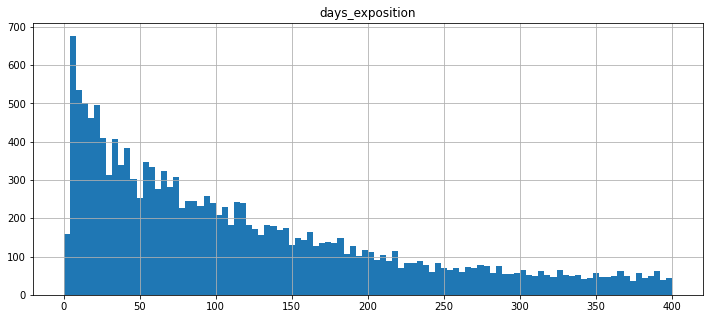

In [114]:
(data
 .query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
 .hist('days_exposition', bins=100, range=(0,400), figsize = (12,5))
);

(1.0, 700.0)

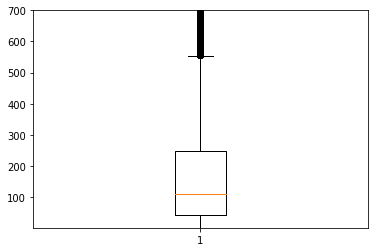

In [115]:
plt.boxplot(data.query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')['days_exposition'])
plt.ylim(1,700)

In [116]:
(data.query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')['days_exposition']).describe()

count    18193.000000
mean       183.710603
std        203.941631
min          1.000000
25%         42.000000
50%        110.000000
75%        247.000000
max       1100.000000
Name: days_exposition, dtype: float64

Из графика мы видим, что большое количество квартир продается в первые 100 дней. Далее идет постепенный спад.  
Средняя продолжительность продажи квартир равняется 183 дням, а медианное - 110.
Согласно графику `boxplot` аномальные значения указаны от отметки примерно в 550, а межквартильный размах от 42 до 247 дней, тогда скажем, что нормальное время продажи квартиры составляет от 42 до 247 дней, все что ниже 42 - считаем быстрыми продажами, а что в диапазоне 247-550 дней - долгими.

**Выводы**  

От 42 до 247 дней - столько времени обычно занимает продажа квартиры.
Быстыми продажами считаются те квартиры, которые продали менее чем за 42 дня и, наоборот долгими, которые продавались в диапазоне 247-550 дней.  
Стоит отметить, что в данном анализе не учитывались продажи в определенные дни (30, 45, 60 и 90-й дни), так как было выявлено, что в эти дни объявления автоматически снимаются с публикации и их нельзя расценивать, как состоявшуюся сделку.

### Какие факторы больше всего влияют на полную стоимость объекта?

Построим для наглядности матрицу корреляции с основными параметрами и посмотрим на взаимосвязи.

In [117]:
corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000,0.758,0.645,0.533,0.470
total_area,0.758,1.000,0.916,0.565,0.788
living_area,0.645,0.916,1.000,0.379,0.879
kitchen_area,0.533,0.565,0.379,1.000,0.246
rooms,0.470,0.788,0.879,0.246,1.000


Как мы видим все коэффициенты положительные, с разной степенью линейной связи.  
Самый высокий коэффициент корреляции между `стоимостью объекта` и общей плащадью - 0.758, что в свою очередь правильно характеризует рынок жилой недвижимости - чем больше площадь объекта, тем выше его цена.  
Далее по убыванию идут коэффициенты корреляции с `жилой площадью` и `площадью кухни` (0.645 и 0.533 соответственно). Эти факторы влияют на стоимость квартиры, но уже не в такой большой степени. Но мы так же можем сказать, что чем больше жилая площадь/площадь кухни, тем больше ее полная стоимость.  
Коэффициент корреляции между стоимостью квартиры и количеством в ней `комнат` равен 0.47, что так же говорит о наличии связи, но не такой сильной.  

Далее построим графики, чтобы закрепить все вышесказанное.

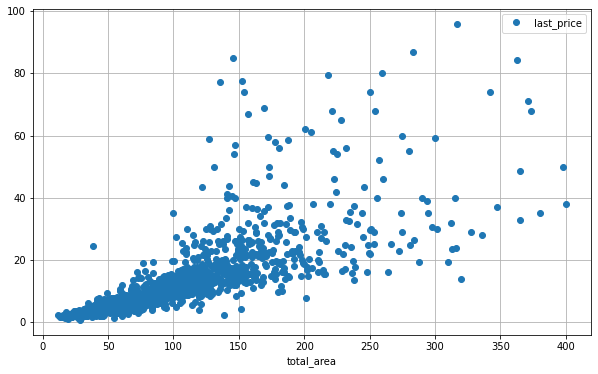

In [118]:
(
    data.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(10, 6))
);

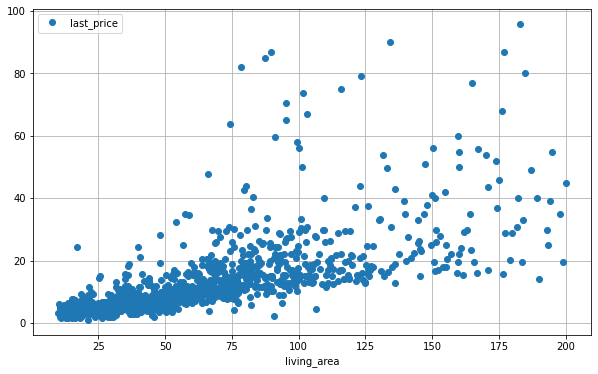

In [119]:
(
    data.pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(10, 6))
);

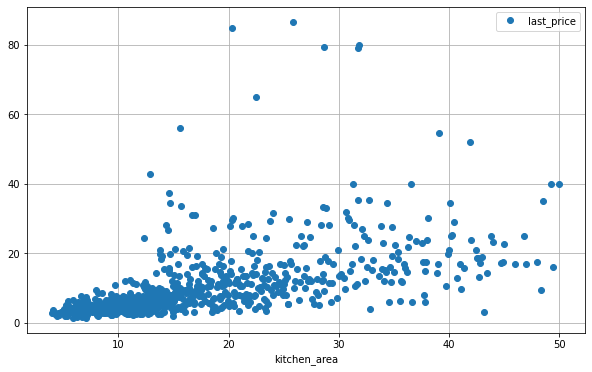

In [120]:
(
    data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(10, 6))
);

На графиках мы также видим положительную корреляцию среди трех показателей. Чем больше общая, жилая и площадь кухни, тем выше стоимость квартиры.  
Менее выделенная связь между ценой объекта недвижимости и площадью кухни.

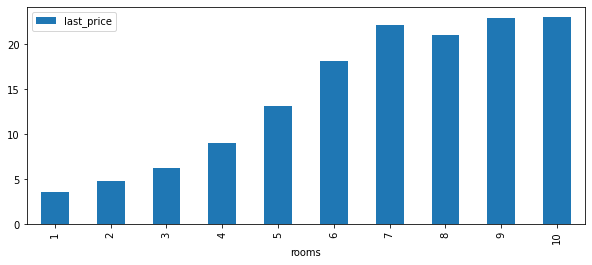

In [121]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(y='last_price', kind='bar', figsize = (10,4))
);

Данный график так же демонстрирует положительную связь, чем больше `количество комнат`, тем выше стоимость объекта недвижимости.

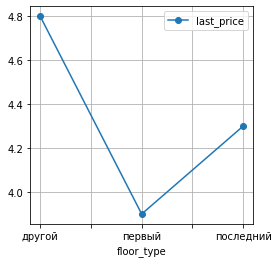

In [122]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(4, 4))
);

Согласно этому графику, видим, что расположение квартиры влияет на ее конечную стоимость. Самые `дешевые` объекты расположены на `первом` этаже, далее чуть дороже квартиры на последних этажах. Самые же `дорогие` квартиры представлены на этажах `кроме первого и последнего`.

Теперь рассмотрим зависимость цены от `даты размещения объявления` (день недели, месяц и год).  

Построим графики для каждого фактора.

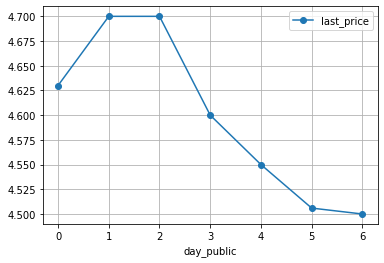

In [123]:
(
    data.pivot_table(index='day_public', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(6, 4))
);

По оси ординат мы видим медианную стоимость объекта, и стоит отметить, что хотя связи между днем объявления и стоимостью квартиры практически нет, дороже квартиры, выставленные во вторник и среду, а к выходным стоимость уменьшается. Это можно обосновать, что выставляя объявление в начале недели, есть время, на то чтобы потенциальные покупатели поизучали их и к выходным обдумали, тогда как выставляя объявление ближе к выходным, времени для решения меньше, и стоить понизить стоимость, чтобы наверняка привлечь внимание покупателей.

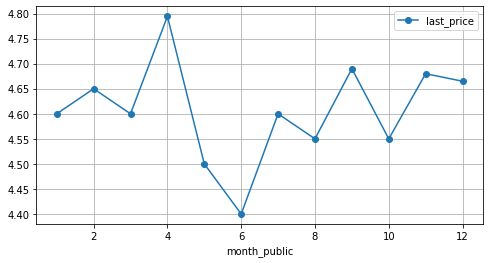

In [124]:
(
    data.pivot_table(index='month_public', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(8, 4))
);

Здесь также стоит отметить, что наиболее дорогие варианты жилой недвижимости выкладываются в апреле, к лету цены снижаются, что объясняется летними каникулами и отпусками. К концу года наблюдается рост стоимости объектов недвижимости.

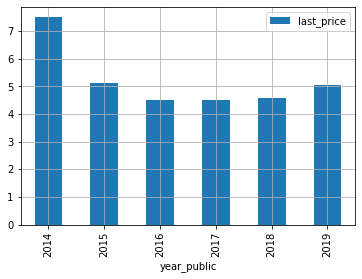

In [125]:
(
    data.pivot_table(index='year_public', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(6, 4))
);

На графике виден заметный спад после 2014 года. Это обусловленно экономической обстановкой в тот период: снижения доходов населения, отказ ряда банков выдавать ипотечные кредиты, увеличение ставок по ипотеке. Начиная с 2018 год наблюдаем рост, что объясняется улучшением экономической ситуации.

**Выводы**

Здесь можно подытожить, что среди всех факторов, наибольшее влияние на стоимость объектов жилой недвижимости оказывают:  
-  общая площадь  
-  жилая площадь  
-  количество комнат  
-  этаж расположения квартиры  

Из графиков, описывающих зависимость цены от даты размещения объявлений, стоит отметить:
-  наиболее высокая стоимость квартир, выставленных на продажу во вторник и среду, а к концу недели стоимость снижается
-  к лету стоимость квартир снижается, самые дорогие выставленны в апреле  
-  после 2014 года стоимость квартир значительно снижалась, а с 2018 снова виден рост цен

### Посчитать `среднюю` цену одного квадратного метра в 10-ти населенных пунктах с наибольшим числом объявлений

In [126]:
top_10_locality = data['locality_name'].value_counts().head(10)
round(data
 .query('locality_name in @top_10_locality.index')
 .pivot_table(index='locality_name', values='price_per_square')
 .sort_values('price_per_square', ascending=False)
)

,price_per_square
locality_name,
Санкт-Петербург,113197.0
Пушкин,102922.0
деревня Кудрово,92454.0
поселок Парголово,90133.0
поселок Мурино,85585.0
поселок Шушары,78535.0
Колпино,75422.0
Гатчина,68746.0
Всеволожск,68740.0


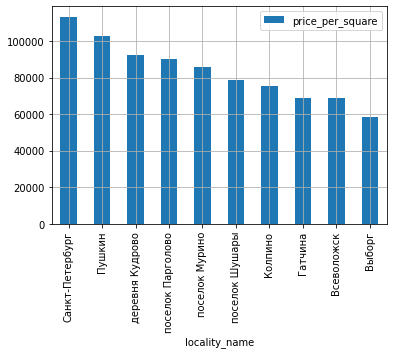

In [127]:
(data
 .query('locality_name in @top_10_locality.index')
 .pivot_table(index='locality_name', values='price_per_square')
 .sort_values('price_per_square', ascending=False)
 .plot(kind='bar', grid=True, figsize=(6, 4))
     );  

**Вывод**  
На гафике и сводной таблице, отчетливо видно, что самая высокая средняя цена за один квадратный метр в Санкт-Петербурге - 113200.  
Далее идет г. Пушкин, что тоже ожидаемо, так как он расположен близко к Санкт-Петербургу, там сосредоточено большое количество достопримечательностей, исторических построек и парков.  
Самая низкая стоимость квадратного метра среди 10 популярных населенных пунктов - в г. Выборг. Что в первую очередь может быть связано с большой отдаленностью от Санкт-Петербурга (~150км.)

### Вычислить `среднюю` цену каждого километра в Санкт-Петербурге

In [128]:
(data
.query('locality_name == "Санкт-Петербург"')
.pivot_table(index='distance_center', values='last_price') 
)

,last_price
distance_center,
0.0,21.404685
1.0,15.770344
2.0,14.713642
3.0,10.718849
4.0,11.155097
5.0,12.283021
6.0,12.949385
7.0,13.632611
8.0,9.122263


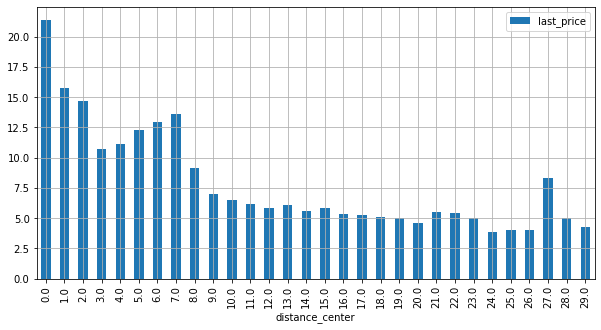

In [129]:
(data
.query('locality_name == "Санкт-Петербург"')
.pivot_table(index='distance_center', values='last_price')
.plot(kind='bar', grid=True, figsize=(10, 5))
);


**Вывод**  
Максимальная стоимость километра, как и ожидалось, в самом центре (<1км до центра). На расстоянии 1-7 км стоимость уже ниже, но все равно имеет высокие значения. И уже после 7-го километра и чем дальше, стоимость снижается. В районе 27-го километра виден небольшой пик, вероятно это элитное жилье или престижный район.

## Общий вывод

-  На этапе предобработки мы заполнили пропущенные значения, привели в соответствие типы данных, выявили и устранили редкие и выбивающиеся значения. Добавили в исходные данные необходимые для анализа столбцы. 
-  По предложению на рынке преобладают квартиры площадью 30-70 кв.м. площадью кухонь - 9 кв.м., расположенные на втором и третьем этажах в пяти- и девятиэтажных домах. В среднем квартиры продаются по цене в 6млн., но представлена и более дорогая недвижимость.  
-  Срок продажи квартир занимает около полугода, быстрыми продажами считаются те квартиры, которые продали менее чем за 42 дня, долгими - более 8 месяцев.  
-  Наибольшее влияние на стоимость объектов жилой недвижимости оказывают общая площадь, жилая площадь, количество комнат и этаж расположения квартиры. Квартиры на первых этажах самые дешевые.  
-  Самая высокая стоимость квадратного метра в Санкт-Петербурге (113200), самая низкая (среди 10-ти самых популярных населенных пунктов) - в Выборге (58240).  
-  Максимальная стоимость квартир в центре города (на расстоянии до 7 км).